# heatmapcharacters

Heatmap of charactersclean against charactersclean, each cell showing the number of times a charactersclean is mentioned in each work.

This follows the Method 2 of Max Hilsdorf, "[Dealing with list values in Pandas dataframes](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173)" on the website [_Towards data science_](https://towardsdatascience.com/), 2020-09-07.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import ds9

df = ds9.df()
df = ds9.keepcolumns(df, 'charactersclean')

# Category datatype for charactersclean

We'll need this later so that the heatmap axes have the most popular characters at the top left.

In [2]:
cat_df = ds9.explode(df, 'charactersclean')
charactersclean_type = ds9.strtotype(cat_df,'charactersclean')
f = cat_df['charactersclean'].value_counts()
f = f.reset_index(name = 'n')
cat_list = f['index'].tolist()

# Bitmap of mentions

In [3]:
def boolean_df(item_lists, unique_items):
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

characters_bool = boolean_df(df['charactersclean'], cat_list)

# Heat

In [4]:
characters_int = characters_bool.astype(int)
characters_freq_matrix = np.dot(characters_int.T, characters_int)
characters_freq_df = pd.DataFrame(characters_freq_matrix,
                                  columns = cat_list,
                                  index = cat_list)

# Heatmap

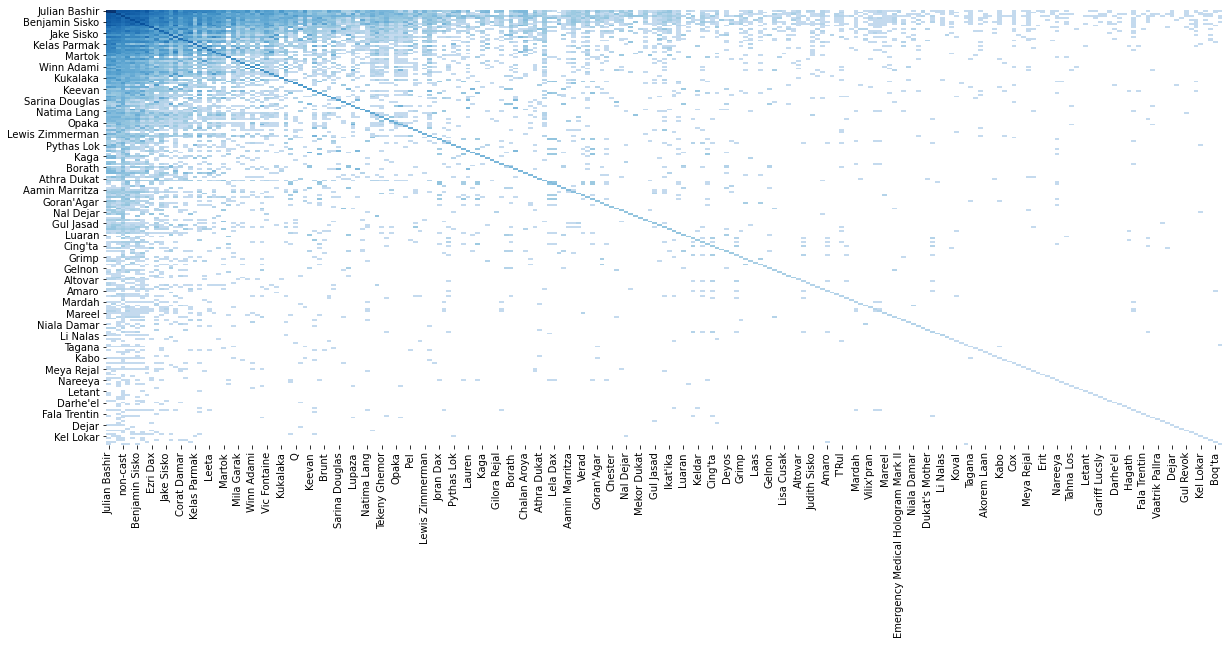

In [5]:
fig, ax = plt.subplots(figsize = (20,8))
cmap = sns.color_palette('Blues', n_colors=100)
sns.heatmap(characters_freq_df, vmin=0, center=1, vmax=3, cmap = cmap, norm=LogNorm(), cbar=False)
plt.xticks(rotation=90)
plt.savefig("heatmapcharacters-characterscleean.svg")

## Heatmap of top 30

### Extract top 30 rows from exploded dataset

In [6]:
cat30_list = cat_list[0:31]
cat30_list.remove('non-cast')
#charactersclean30_df = pd.DataFrame({'charactersclean': cat30_list}, dtype = charactersclean_type)
#top30_df = cat_df[cat_df.charactersclean.isin(charactersclean30_df.charactersclean)]

characters30_bool = boolean_df(df['charactersclean'], cat30_list)
characters30_int = characters30_bool.astype(int)
characters30_freq_matrix = np.dot(characters30_int.T, characters30_int)
characters30_freq_df = pd.DataFrame(characters30_freq_matrix,
                                  columns = cat30_list,
                                  index = cat30_list)
characters30_freq_df

,Julian Bashir,Elim Garak,Kira Nerys,Jadzia Dax,Odo,Benjamin Sisko,Quark,Miles O'Brien,Ezri Dax,Skrain Dukat,...,Leeta,Molly O'Brien,Kasidy Yates,Martok,Lenara Kahn,Morn,Mila Garak,Lwaxana Troi,Amsha Bashir,Winn Adami
Julian Bashir,4938,3946,887,991,668,803,558,922,324,202,...,123,111,58,74,27,57,39,36,69,17
Elim Garak,3946,4521,692,717,584,555,451,651,194,236,...,103,94,47,60,10,47,67,37,49,12
Kira Nerys,887,692,1945,905,631,600,398,448,270,209,...,74,66,86,28,28,32,16,33,16,36
Jadzia Dax,991,717,905,1631,453,608,369,475,143,89,...,86,42,49,32,66,43,10,29,19,20
Odo,668,584,631,453,1380,457,669,349,100,117,...,76,46,36,29,5,51,16,45,8,14
Benjamin Sisko,803,555,600,608,457,1190,299,449,118,139,...,65,35,81,34,16,38,10,18,19,23
Quark,558,451,398,369,669,299,1122,278,121,91,...,87,33,36,20,8,67,8,21,7,10
Miles O'Brien,922,651,448,475,349,449,278,1051,119,61,...,60,113,41,33,5,34,10,13,23,12
Ezri Dax,324,194,270,143,100,118,121,119,577,18,...,30,14,40,12,29,11,3,4,10,4
Skrain Dukat,202,236,209,89,117,139,91,61,18,544,...,8,8,7,11,0,11,6,9,2,24


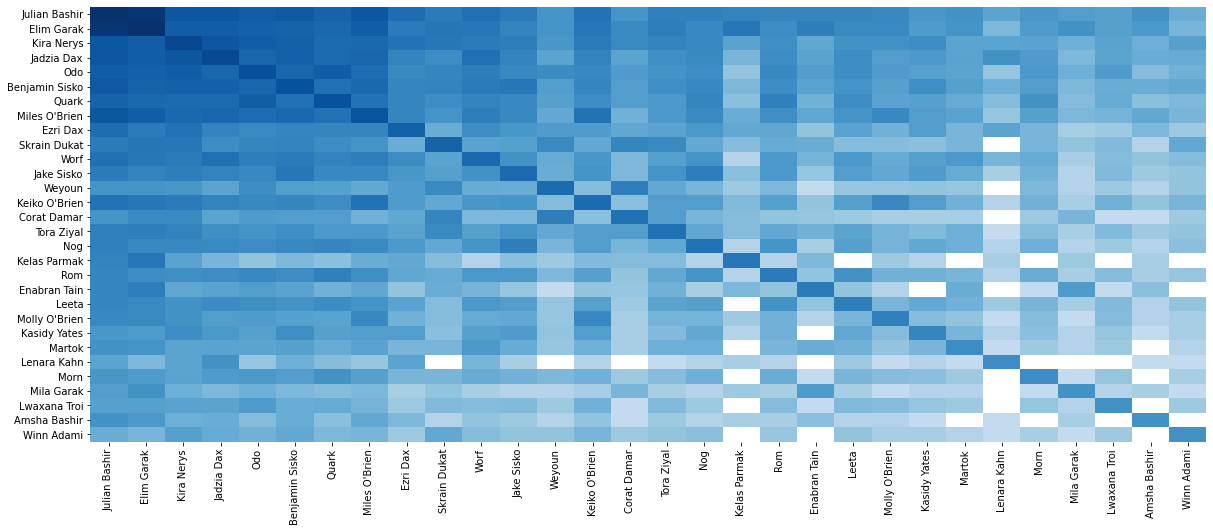

In [7]:
fig, ax = plt.subplots(figsize = (20,8))
cmap = sns.color_palette('Blues', n_colors=100)
sns.heatmap(characters30_freq_df, vmin=0, vmax=3, center=1, cmap = cmap, norm=LogNorm(), cbar=False)
plt.xticks(rotation=90)
plt.savefig("heatmapcharacters-characterscleean-top30.svg")